# Unsupervised Learning

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

### Importing Dataset

In [2]:
df_0 = pd.read_csv("Live.csv")
df_0.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


### Performing EDA

#### 1. Finding na columns

In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df_0.isnull().sum() 

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

#### 2. Dropping null columns

In [6]:
df_1 = df_0.drop(columns={'Column1','Column2','Column3','Column4'},axis=1)
df_1.head(1)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


#### 3. Dropping Duplicates

In [7]:
df_2 = df_1.drop_duplicates()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6999 non-null   object
 1   status_type       6999 non-null   object
 2   status_published  6999 non-null   object
 3   num_reactions     6999 non-null   int64 
 4   num_comments      6999 non-null   int64 
 5   num_shares        6999 non-null   int64 
 6   num_likes         6999 non-null   int64 
 7   num_loves         6999 non-null   int64 
 8   num_wows          6999 non-null   int64 
 9   num_hahas         6999 non-null   int64 
 10  num_sads          6999 non-null   int64 
 11  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.8+ KB


In [8]:
df_2.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### Checking for Unique IDs
- Here we go for a min number of categories on the basis of which we can build clusters
- A number between 1 to 10 is ideal

#### 1. Searching for the ideal column for categories (finding the best K)

In [ ]:
df_2['status_id'].unique()



array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      shape=(6913,), dtype=object)

In [12]:
df_2['status_type'].unique()


array(['video', 'photo', 'link', 'status'], dtype=object)

In [13]:
df_2['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      shape=(6913,), dtype=object)

#### 2. Dropping the unnecessary columns

In [14]:
df_2 = df_2.drop(columns={'status_id','status_published'})
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    6999 non-null   object
 1   num_reactions  6999 non-null   int64 
 2   num_comments   6999 non-null   int64 
 3   num_shares     6999 non-null   int64 
 4   num_likes      6999 non-null   int64 
 5   num_loves      6999 non-null   int64 
 6   num_wows       6999 non-null   int64 
 7   num_hahas      6999 non-null   int64 
 8   num_sads       6999 non-null   int64 
 9   num_angrys     6999 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 601.5+ KB


### Declare feature vector and target variable

In [29]:
X = df_2
Y = df_2['status_type']

### Convert categorical values to integer values

In [30]:
lencoder = LabelEncoder()

X['status_type'] = lencoder.fit_transform(X['status_type'])
Y = lencoder.transform(Y)
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [31]:
X.info()
cols = X.columns

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    6999 non-null   int64
 1   num_reactions  6999 non-null   int64
 2   num_comments   6999 non-null   int64
 3   num_shares     6999 non-null   int64
 4   num_likes      6999 non-null   int64
 5   num_loves      6999 non-null   int64
 6   num_wows       6999 non-null   int64
 7   num_hahas      6999 non-null   int64
 8   num_sads       6999 non-null   int64
 9   num_angrys     6999 non-null   int64
dtypes: int64(10)
memory usage: 601.5 KB


### We would be scaling the values to normalise every input feature

In [33]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X,columns=[cols])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### Building the Model

#### 1. Initializing the model
- We are calling the class KMeans from sklearn
- We are defining the K value according our estimate

In [35]:
kmeans = KMeans(n_clusters=2,random_state=0)

#### 2. Train the model on our Data

In [36]:
kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


#### 3. Checking model params and results

In [38]:
kmeans.cluster_centers_

array([[3.46167950e-01, 3.61833423e-02, 7.27812657e-04, 7.13272262e-04,
        3.57027040e-02, 1.99861691e-03, 2.13215566e-03, 1.16037081e-03,
        2.63163571e-03, 1.24915717e-03],
       [9.83564249e-01, 6.92281072e-02, 2.92995889e-02, 3.22130472e-02,
        6.10062518e-02, 5.16536230e-02, 8.90485655e-03, 1.05300588e-02,
        8.13397894e-03, 7.82133186e-03]])

In [39]:
kmeans.inertia_

231.09008425740083

In [48]:
labels = kmeans.labels_
correct_labels = sum(Y == labels)
print("Result: %d out of %d samples were correctly labeled."%(correct_labels,Y.size))
if(Y.size/correct_labels>100) :print("What is this bulls#!t model?\nSorry my bad I meant the model is of Low Accuracy") 
else :print("Okay effort...Model is of decent accuracy")

Result: 63 out of 6999 samples were correctly labeled.
What is this bulls#!t model?
Sorry my bad I meant the model is of Low Accuracy


### Reiteraion:

#### Model -2
- Since the Accuracy of our model is quite Low we will be proceeding with increasing the number of K for denoting more clusters

In [55]:
kmeans_k3 = KMeans(n_clusters=3,random_state=0)
kmeans_k3.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [56]:
kmeans_k3.cluster_centers_

array([[3.49828962e-01, 1.99656714e-02, 6.65278519e-04, 5.16642867e-04,
        1.95102005e-02, 1.89382303e-03, 1.90971510e-03, 1.14025086e-03,
        2.90205022e-03, 1.29473645e-03],
       [1.00000000e+00, 5.21183253e-02, 3.11289054e-02, 3.42976026e-02,
        4.33869492e-02, 5.50734339e-02, 8.96298668e-03, 1.12548771e-02,
        8.26403860e-03, 8.34600011e-03],
       [5.00000000e-01, 3.95448431e-01, 2.93292576e-03, 4.40079526e-03,
        3.94357189e-01, 4.06515594e-03, 8.15496671e-03, 9.89041421e-04,
        7.91620996e-04, 2.00360649e-04]])

In [60]:
kmeans_k3.inertia_

158.12552380194998

In [59]:
labels = kmeans_k3.labels_
correct_labels_k3 = sum(Y == labels)
print("Result: %d out of %d samples were correctly labeled."%(correct_labels_k3,Y.size))
if(Y.size/correct_labels_k3>10) :print("What is this bulls#!t model?\nSorry my bad I meant the model is of Low Accuracy") 
else :print("Okay effort...Model is of decent accuracy")

Result: 142 out of 6999 samples were correctly labeled.
What is this bulls#!t model?
Sorry my bad I meant the model is of Low Accuracy


#### Model Iterator
- Since Making all models manually would be a hassle
- We will be making a iterator for finding the best k value


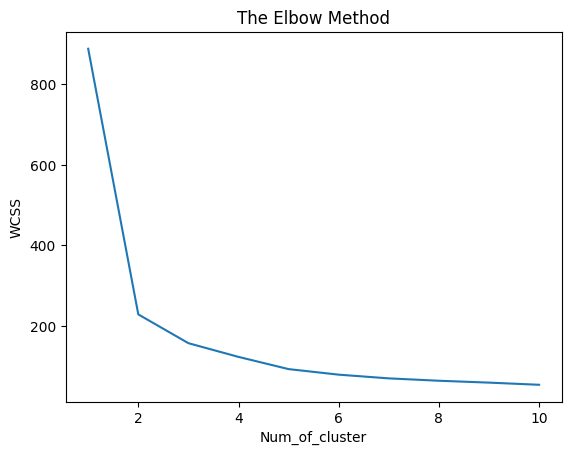

In [66]:
cluster_space_inertia = []
cluster_space_cluster_centres = []
cluster_space_accuracy = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init = 10,random_state=0)
    kmeans.fit(X)
    cluster_space_inertia.append(kmeans.inertia_)
    cluster_space_cluster_centres.append(kmeans.cluster_centers_)
    labels_km = kmeans.labels_
    correct_labels = sum(Y == labels_km)
    cluster_space_accuracy.append((correct_labels)/float(Y.size))
plt.plot(range(1,11),cluster_space_inertia)
plt.title("The Elbow Method")
plt.xlabel("Num_of_cluster")
plt.ylabel("WCSS")
plt.show()

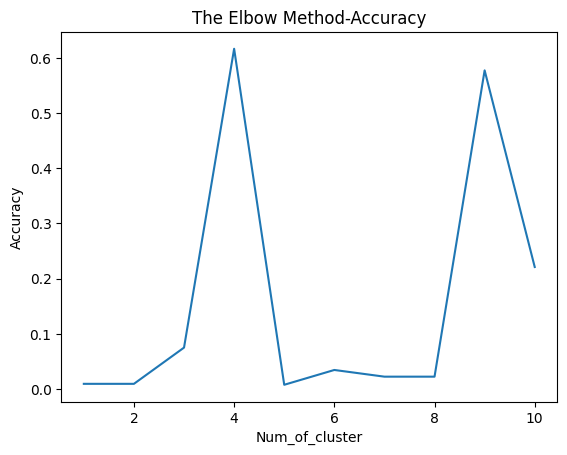

In [68]:
plt.plot(range(1,11),cluster_space_accuracy)
plt.title("The Elbow Method-Accuracy")
plt.xlabel("Num_of_cluster")
plt.ylabel("Accuracy")
plt.show()

In [73]:
temp =0
max_val = 0
for i in range(len(cluster_space_accuracy)):
    temp = cluster_space_accuracy[i]
    if(cluster_space_accuracy[max_val]<temp): max_val = i
    else: continue

print("Maximum accuracy found at %d clusters with accurcy score: %f"%(max_val+1, max(cluster_space_accuracy)))


Maximum accuracy found at 4 clusters with accurcy score: 0.616660


### Insights:
- We have implemented the K-Means Clustering method
- We have applied the elbow method to find that k = 4 is one of the best number of clusters
- We have accuracy results to support that k=4 and k = 10 have high accuracy